# Lab 1.02 - Android Persistence

Import all necessary Python libraries and create a variable `android_persistence` to load the dataset [android_persistence_cpu.csv](https://github.com/HoGentTIN/dsai-en-labs/blob/main/data/android_persistence_cpu.csv). See the [code book](https://github.com/HoGentTIN/dsai-en-labs/blob/main/data/android_persistence_cpu.md) for more info on the contents. Note this file is not stored as a regular CSV file! You may need to tweak the parameters of the import function to load the file correctly.

In [19]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

ap= pd.read_csv('../data/android_persistence_cpu.csv', sep=';')
ap.head()

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


Explore the dataset:

- How many variables and observations are present in the dataset?
- What is the level of measurement of each variable?
- Perform the conversion of the qualitative variables to the appropriate type (and specify the order of ordinal variables).
- List the data types in the dataset.

In [21]:
#1
print(ap.describe())
#2
# Time: ratio
# Persistence type: nominal
# DataSize: ordinal

#3
DataSizeType = CategoricalDtype(categories= ['Small', 'Medium','Large'], ordered=True)
ap.DataSize = ap.DataSize.astype(DataSizeType)
PersistenceTypeOrder = CategoricalDtype(categories= ['GreenDAO', 'Realm', 'SharedPreferences', 'SQLLite'], ordered=True)
ap.PersistenceType = ap.PersistenceType.astype(PersistenceTypeOrder)
print(ap.DataSize.describe())
print(ap.PersistenceType)


# 4
print(ap.dtypes)

             Time
count  300.000000
mean     6.230833
std      4.229599
min      1.090000
25%      1.790000
50%      6.185000
75%     10.662500
max     13.560000
count       300
unique        3
top       Small
freq        120
Name: DataSize, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
295    Realm
296    Realm
297    Realm
298    Realm
299    Realm
Name: PersistenceType, Length: 300, dtype: category
Categories (4, object): ['GreenDAO' < 'Realm' < 'SharedPreferences' < 'SQLLite']
Time                float64
PersistenceType    category
DataSize           category
dtype: object


Describe each variable.

In [22]:
ap.describe(include='all')

,Time,PersistenceType,DataSize
count,300.000000,270,300
unique,NaN,3,3
top,NaN,GreenDAO,Small
freq,NaN,90,120
mean,6.230833,NaN,NaN
std,4.229599,NaN,NaN
min,1.090000,NaN,NaN
25%,1.790000,NaN,NaN
50%,6.185000,NaN,NaN
75%,10.662500,NaN,NaN


What unique values are there for the variables `PersistenceType` and `DataSize`? How often does each value occur?

In [24]:
print(ap.PersistenceType.unique())
print(ap.DataSize.unique())

print(ap.DataSize.value_counts())
print(ap.PersistenceType.value_counts())

[NaN, 'GreenDAO', 'SQLLite', 'Realm']
Categories (4, object): ['GreenDAO' < 'Realm' < 'SharedPreferences' < 'SQLLite']
['Small', 'Medium', 'Large']
Categories (3, object): ['Small' < 'Medium' < 'Large']
DataSize
Small     120
Medium     90
Large      90
Name: count, dtype: int64
PersistenceType
GreenDAO             90
Realm                90
SQLLite              90
SharedPreferences     0
Name: count, dtype: int64


In this dataset, it is especially interesting to know how often each unique combination of `PersistenceType` and `DataSize` occurs. Figure out how to use the Pandas function `crosstab()` to create a so-called contingency table for these variables. By the way, this concept will return in Module 4 (examining the relationship between 2 qualitative variables).

<Axes: xlabel='PersistenceType'>

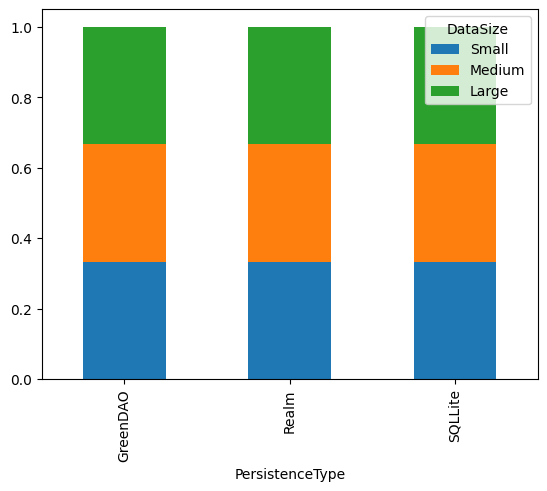

In [27]:
pd.crosstab(ap['PersistenceType'],ap['DataSize'], normalize='index').plot(kind='bar', stacked='true')